less = df[df['income']=='<=50K']
more = df[df['income']=='>50K']


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
os.getcwd()

'/home/vizziwo/otherprojects'

In [38]:
df = pd.read_csv('adult.csv')

In [39]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Questions off the bat:
What is the difference in income level among different races / genders / maritalstatuses / relationships / native countries? 
Do these categories affect hours worked for the same income?
Does educational-num or education correlate with income level?
        Or another way to ask: what is the distribution of educational levels among under 50K and over 50k?
What is the mean hours-worked for each race, each gender for all incomes? For under 50k? For over 50k?
Does capital gain / loss correlate with education level?
What is the count of races/genders/education/etc among workclasses?
Which occupations are most common? What are common characteristics of workers in certain occupations?


Kinds of data analysis:

Univariate analysis: histograms and count plots for all single variables.

Bivariate: relationship with income for all variables.

Multivariate: correlation among numeric vars. 
     income, age, and gender
     income, hours-per-week, and gender
     income, hours-per-week, and age
     income, hours-per-week, and marital status
     income, age, and marital status
     income, hours-per-week, and relationship
     income, hours-per-week, and education
     income, age and education
     income, age, and marital status
     ...


Kinds of plots to consider:

Correlations - yes
        e.g. pairplot, scatterplot, heatmap

Time-series plot - no

Histogram - yes
        (see above)

Compare two related quantities- yes 
        e.g. (lineplot/violinplot/swarmplot or boxplot)

Is there any hypothesis I can and should investigate? - yes
    does gender affect income? chi squared, bootstrapping (if i resampled the same no. of women and men from the pool, would I get the same proportions of women and men in each income class)
    
Trends: 
are there outliers and anomalies? - yes. 
        lineplot of outliers: comparing incomeclass of outliers to each feature.
        do correlations of features for outliers alone.

My audience will be non-technical. 

In [40]:
df.shape

(48842, 15)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Removing Null Values

In [42]:
df.replace('?', np.nan, inplace=True)

In [43]:
df.dropna(inplace=True)

#### Correlation 

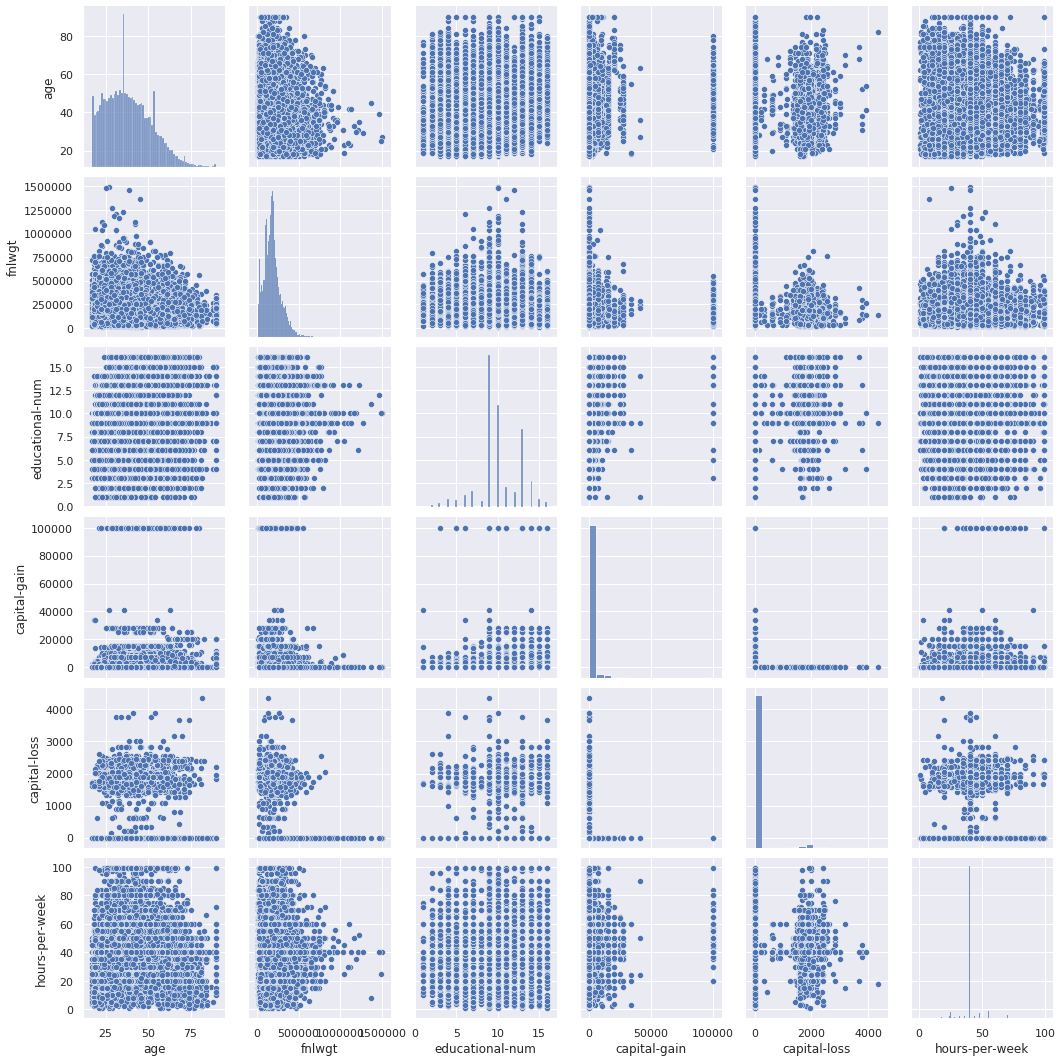

In [44]:
sns.pairplot(df)

In [45]:
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

#### I don't see much correlation.

Seeing Outliers: Box Plots

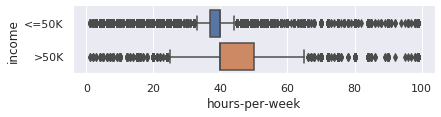

In [46]:
g = sns.catplot(x="hours-per-week", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

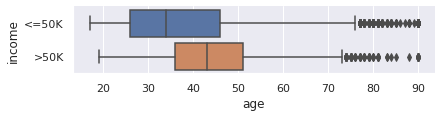

In [47]:
g = sns.catplot(x="age", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

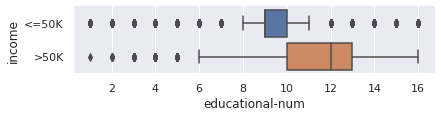

In [48]:
g = sns.catplot(x="educational-num", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

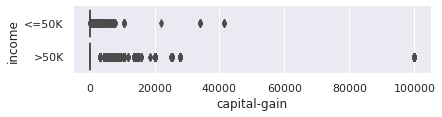

In [49]:
g = sns.catplot(x="capital-gain", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

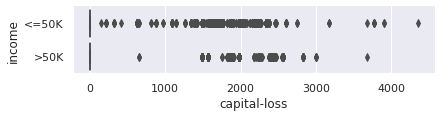

In [50]:
g = sns.catplot(x="capital-loss", y="income",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
#g.set(xscale="log")

All 'capital gains' and capital losses greater than 0 are outliers.

### Visualizing Outliers

Trends: are there outliers and anomalies? - yes. lineplot of outliers: comparing incomeclass of outliers to each feature. do correlations of features for outliers alone.

#### High-Hour Workers By Income and Feature

In [98]:
#less
col = 'hours-per-week'
mask = df['income']=='<=50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_less, low_ol_less = segment[segment[col]>upper], segment[segment[col]<lower]

#more
mask = df['income']=='>50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_more, low_ol_more = segment[segment[col]>upper], segment[segment[col]<lower]

#all
high_ol = pd.concat([high_ol_less, high_ol_more])
low_ol = pd.concat([low_ol_less, low_ol_more])

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Amer-Indian-Eskimo')]

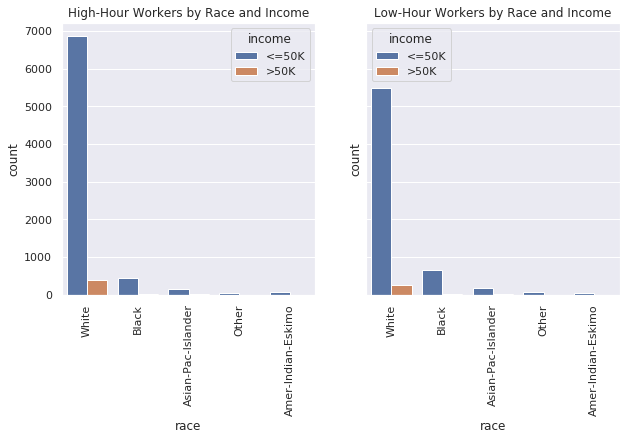

In [101]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
g = sns.countplot(high_ol['race'], hue=high_ol.income, ax=ax1)
sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Hour Workers by Race and Income')
ax2.set_title('Low-Hour Workers by Race and Income')
ax1.set_xticklabels(high_ol['race'].unique(), rotation=90)
ax2.set_xticklabels(low_ol['race'].unique(), rotation=90)


In [100]:
high_ol.race.value_counts()

White                 7251
Black                  452
Asian-Pac-Islander     178
Amer-Indian-Eskimo      71
Other                   48
Name: race, dtype: int64

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Low-Hour Workers by Gender and Income')

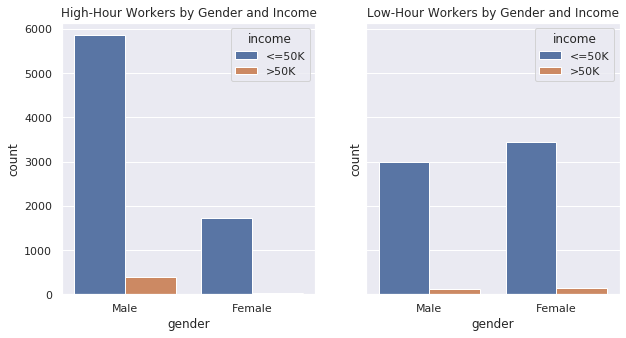

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(5, 10)})
sns.countplot(high_ol['gender'], hue=high_ol.income, ax=ax1, )
sns.countplot(low_ol['gender'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Hour Workers by Gender and Income')
ax2.set_title('Low-Hour Workers by Gender and Income')


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'State-gov'),
 Text(0, 0, 'Without-pay')]

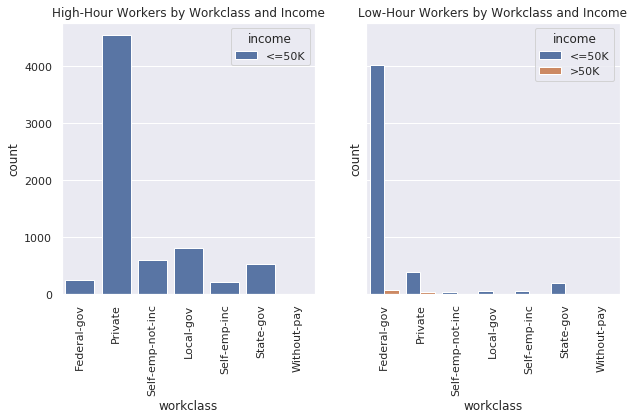

In [95]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['workclass'], hue=high_ol.income, ax=ax1, )
sns.countplot(low_ol['workclass'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Hour Workers by Workclass and Income')
ax2.set_title('Low-Hour Workers by Workclass and Income')
ax1.set_xticklabels(high_ol['workclass'].unique(), rotation=90)
ax2.set_xticklabels(high_ol['workclass'].unique(), rotation=90)


# I could go on but I'll stop for now. 

#### Comparing the number of people in each income class in the outliers for age

In [55]:
#less
col='age'
mask = df['income']=='<=50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_less, low_ol_less = segment[segment[col]>upper], segment[segment[col]<lower]

#more
mask = df['income']=='>50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_more, low_ol_more = segment[segment[col]>upper], segment[segment[col]<lower]

#all
high_ol = pd.concat([high_ol_less, high_ol_more])
low_ol = pd.concat([low_ol_less, low_ol_more])

In [56]:
#no low outliers
low_ol

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Amer-Indian-Eskimo')]

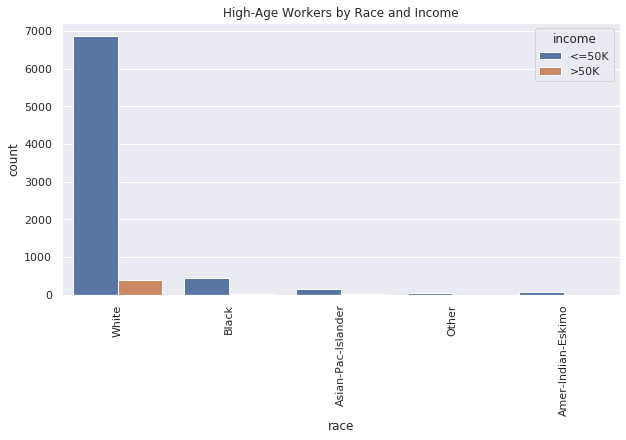

In [102]:
f, ax1 = plt.subplots(1, 1, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['race'], hue=high_ol.income, ax=ax1)
#sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Age Workers by Race and Income')
#ax2.set_title('Low-Age Workers by Race and Income')
ax1.set_xticklabels(high_ol['race'].unique(), rotation=90)
#ax2.set_xticklabels(high_ol['race'].unique(), rotation=90)


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

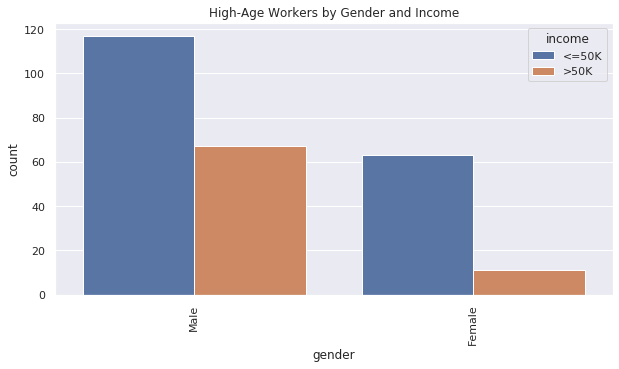

In [58]:
f, ax1 = plt.subplots(1, 1, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['gender'], hue=high_ol.income, ax=ax1)
#sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Age Workers by Gender and Income')
#ax2.set_title('Low-Age Workers by Race and Income')
ax1.set_xticklabels(high_ol['gender'].unique(), rotation=90)
#ax2.set_xticklabels(high_ol['race'].unique(), rotation=90)


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'HS-grad'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Bachelors'),
 Text(0, 0, '10th'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '12th'),
 Text(0, 0, '1st-4th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, '11th'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Assoc-acdm')]

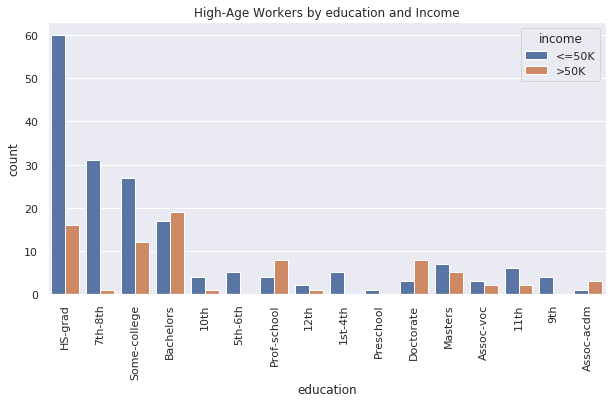

In [59]:
f, ax1 = plt.subplots(1, 1, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['education'], hue=high_ol.income, ax=ax1)
#sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Age Workers by education and Income')
#ax2.set_title('Low-Age Workers by Race and Income')
ax1.set_xticklabels(high_ol['education'].unique(), rotation=90)
#ax2.set_xticklabels(high_ol['race'].unique(), rotation=90)


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Widowed'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Never-married'),
 Text(0, 0, 'Separated')]

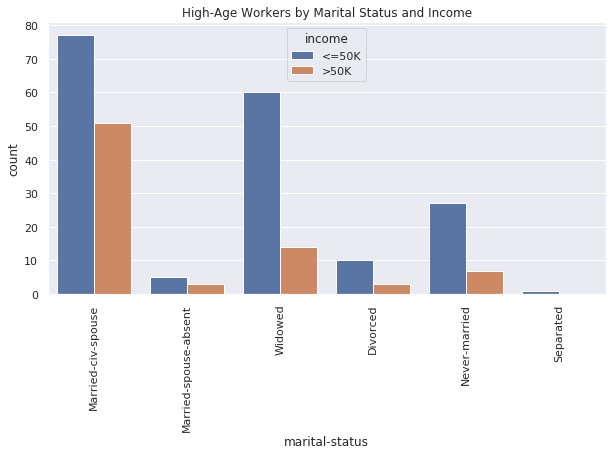

In [60]:
f, ax1 = plt.subplots(1, 1, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['marital-status'], hue=high_ol.income, ax=ax1)
#sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Age Workers by Marital Status and Income')
#ax2.set_title('Low-Age Workers by Race and Income')
ax1.set_xticklabels(high_ol['marital-status'].unique(), rotation=90)
#ax2.set_xticklabels(high_ol['race'].unique(), rotation=90)


#### Comparing the number of people in each income class in the outliers for education

In [106]:
#less
col = 'educational-num'
mask = df['income']=='<=50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_less, low_ol_less = segment[segment[col]>upper], segment[segment[col]<lower]

#more
mask = df['income']=='>50K'
segment = df[mask]
quantile3 = np.quantile(segment[col], 0.75)
quantile1 = np.quantile(segment[col], 0.25)
iqr = quantile3 - quantile1
upper, lower = quantile3 + 1.5*iqr, quantile1 - 1.5*iqr
high_ol_more, low_ol_more = segment[segment[col]>upper], segment[segment[col]<lower]

#all
high_ol = pd.concat([high_ol_less, high_ol_more])
low_ol = pd.concat([low_ol_less, low_ol_more])

In [70]:
np.quantile(df[mask]['educat'])

13.0

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Amer-Indian-Eskimo')]

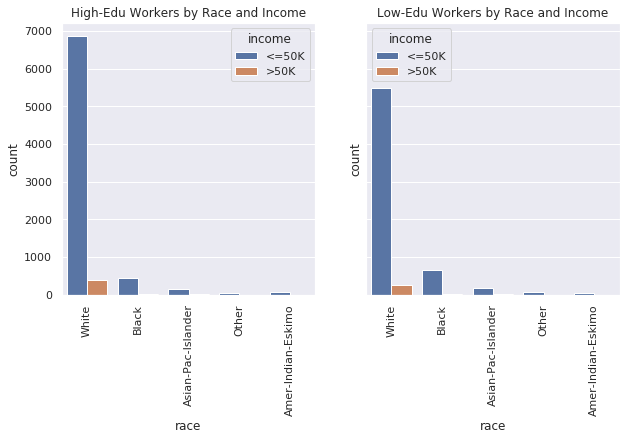

In [103]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(high_ol['race'], hue=high_ol.income, ax=ax1)
sns.countplot(low_ol['race'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Edu Workers by Race and Income')
ax2.set_title('Low-Edu Workers by Race and Income')
ax1.set_xticklabels(high_ol['race'].unique(), rotation=90)
ax2.set_xticklabels(low_ol['race'].unique(), rotation=90)


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

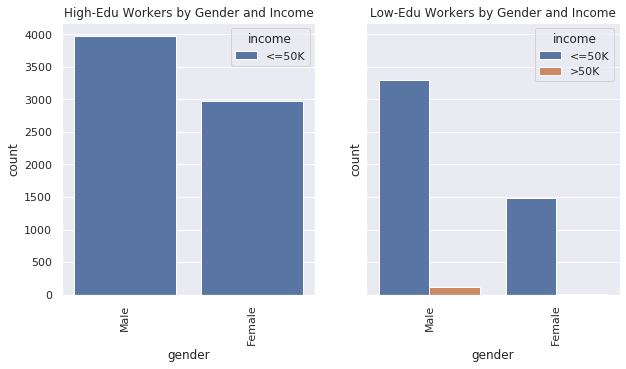

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['gender'], hue=high_ol.income, ax=ax1)
sns.countplot(low_ol['gender'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Edu Workers by Gender and Income')
ax2.set_title('Low-Edu Workers by Gender and Income')
ax1.set_xticklabels(high_ol['gender'].unique(), rotation=90)
ax2.set_xticklabels(high_ol['gender'].unique(), rotation=90)


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Private'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Without-pay')]

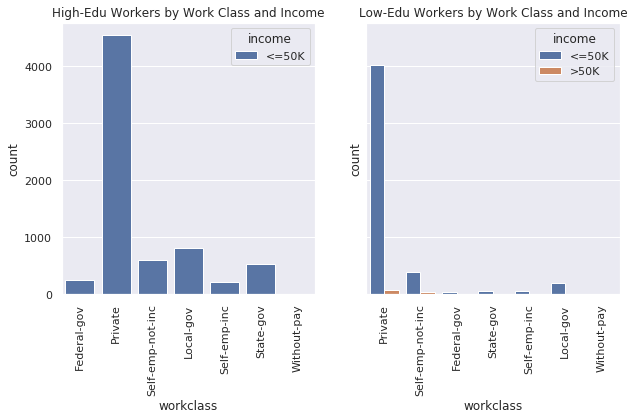

In [108]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(high_ol['workclass'], hue=high_ol.income, ax=ax1)
sns.countplot(low_ol['workclass'], hue=low_ol.income, ax=ax2)
ax1.set_title('High-Edu Workers by Work Class and Income')
ax2.set_title('Low-Edu Workers by Work Class and Income')
ax1.set_xticklabels(high_ol['workclass'].unique(), rotation=90)
ax2.set_xticklabels(low_ol['workclass'].unique(), rotation=90)


##  Plotting each feature's relationship with Income

Text(0.5, 1.0, 'Races of Workers by Income Class')

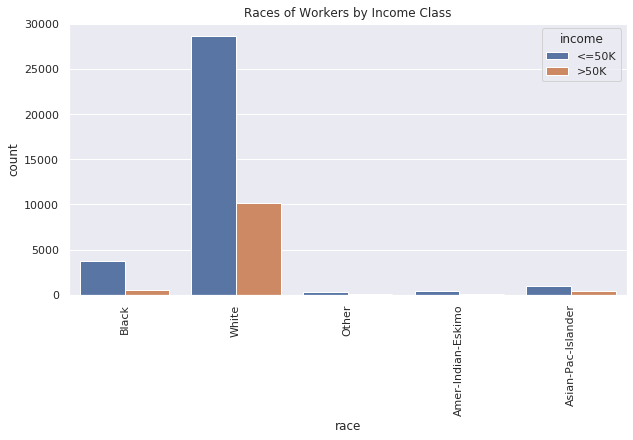

In [130]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, x='race', hue='income')
g.set_xticklabels(df['race'].unique(), rotation=90)
g.set_title('Races of Workers by Income Class')

Text(0.5, 1.0, 'Gender of Workers by Income Class')

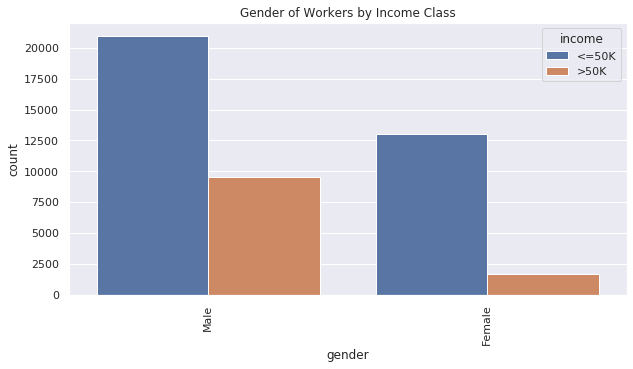

In [131]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, x='gender', hue='income')
g.set_xticklabels(df['gender'].unique(), rotation=90)
g.set_title('Gender of Workers by Income Class')

Text(0.5, 1.0, 'Workclass of Workers by Income Class')

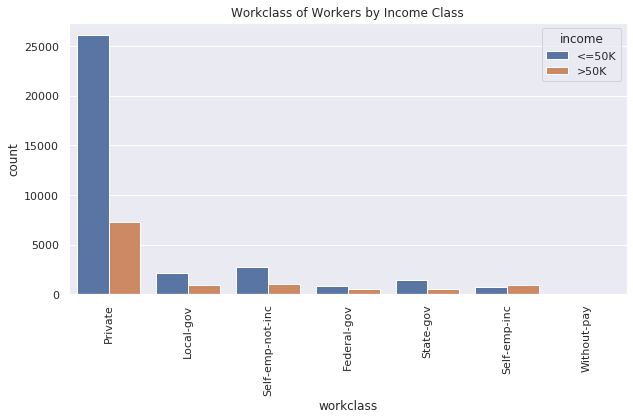

In [132]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, x='workclass', hue='income')
g.set_xticklabels(df['workclass'].unique(), rotation=90)
g.set_title('Workclass of Workers by Income Class')

Text(0.5, 1.0, 'Marital Status of Workers by Income Class')

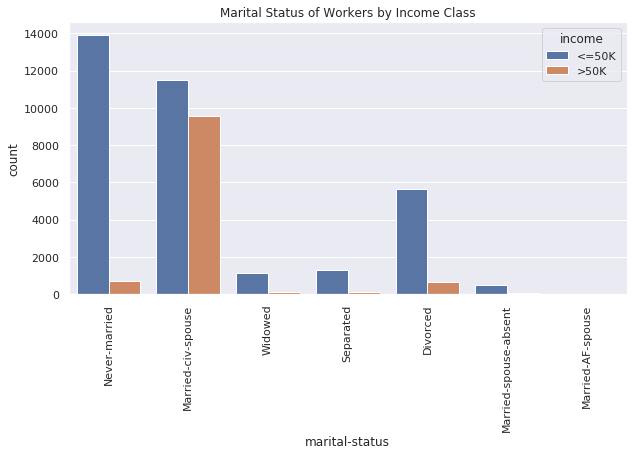

In [133]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, x='marital-status', hue='income')
g.set_xticklabels(df['marital-status'].unique(), rotation=90)
g.set_title('Marital Status of Workers by Income Class')

In [134]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Text(0.5, 1.0, 'Hours per Week of Workers by Income Class')

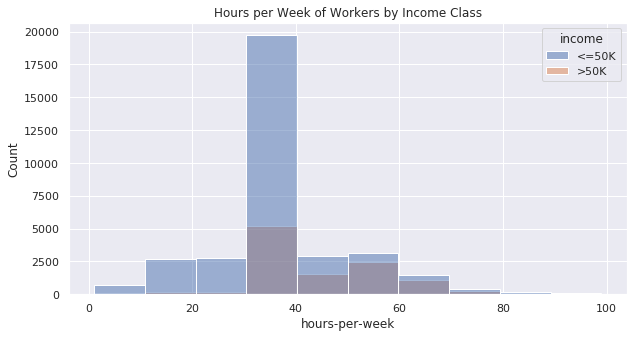

In [138]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.histplot(data=df, x='hours-per-week', hue='income', bins=10)
#g.set_xticklabels(df['hours-per-week'].unique(), rotation=90)
g.set_title('Hours per Week of Workers by Income Class')

Text(0.5, 1.0, 'Age per Week of Workers by Income Class')

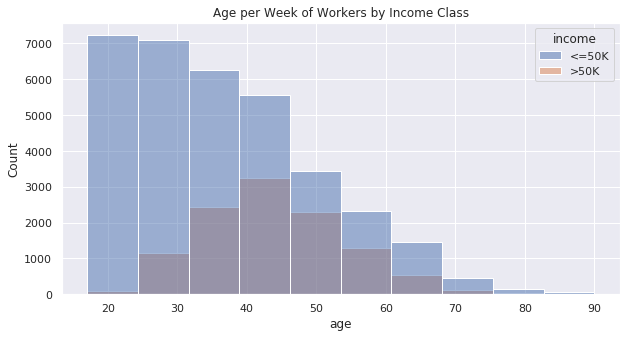

In [139]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.histplot(data=df, x='age', hue='income', bins=10)
#g.set_xticklabels(df['hours-per-week'].unique(), rotation=90)
g.set_title('Age per Week of Workers by Income Class')

Text(0.5, 1.0, 'Occupation of Workers by Income Class')

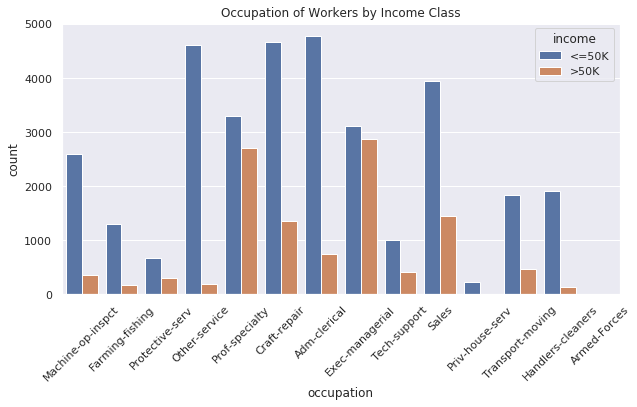

In [141]:
sns.set(rc={'figure.figsize':(10, 5)})
g= sns.countplot(data=df, x='occupation', hue='income')
g.set_xticklabels(df['occupation'].unique(), rotation=45)
g.set_title('Occupation of Workers by Income Class')

In [142]:
g.set_xticklabels?